In [676]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import geopandas as gpd

Asian_Data = pd.read_csv("Data/VD/Asian.csv")
White_data = pd.read_csv("Data/VD/White.csv")    
Hispanic_Data = pd.read_csv("Data/VD/Hispanic.csv")
African_American_Data = pd.read_csv("Data/VD/African American.csv")
                
Asian_rename = Asian_Data.rename(columns = {'Value':'Asian'})
White_rename = White_data.rename(columns = {'Value':'White'})
Hispanic_rename = Hispanic_Data.rename(columns = {'Value':'Hispanic/Latino'})
African_American_rename = African_American_Data.rename(columns = {'Value':'African American/Black'})


Asian_final = Asian_rename.drop(['Series ID','Year','Period'], axis=1)
White_final = White_rename.drop(['Series ID','Year','Period'], axis=1)
Hispanic_final = Hispanic_rename.drop(['Series ID','Year','Period'], axis=1)
African_American_final = African_American_rename.drop(['Series ID','Year','Period'], axis=1)
African_American_final

,Label,African American/Black
0,2019 Jan,6.9
1,2019 Feb,7.0
2,2019 Mar,6.5
3,2019 Apr,6.6
4,2019 May,6.1
5,2019 Jun,6.0
6,2019 Jul,5.6
7,2019 Aug,5.2
8,2019 Sep,5.4
9,2019 Oct,5.6


# Plotting Unemployment Rates across U.S. by Months

In [677]:
combined1_data = pd.merge(Asian_final, White_final, on = "Label", how = "left")
combined2_data = pd.merge(Hispanic_final, African_American_final, on = "Label", how = "left")
combined3_data = pd.merge(combined1_data, combined2_data, on = "Label", how = "left")
combined_data = combined3_data.rename(columns = {'Label':'Months'})
combined_data
#combined_data.style.highlight_max(color = 'lightgreen')


,Months,Asian,White,Hispanic/Latino,African American/Black
0,2019 Jan,3.0,3.5,4.8,6.9
1,2019 Feb,3.1,3.2,4.3,7.0
2,2019 Mar,3.1,3.3,4.5,6.5
3,2019 Apr,2.3,3.2,4.1,6.6
4,2019 May,2.5,3.3,4.1,6.1
5,2019 Jun,2.2,3.3,4.3,6.0
6,2019 Jul,2.8,3.3,4.4,5.6
7,2019 Aug,2.8,3.4,4.2,5.2
8,2019 Sep,2.5,3.2,4.0,5.4
9,2019 Oct,2.9,3.3,4.2,5.6


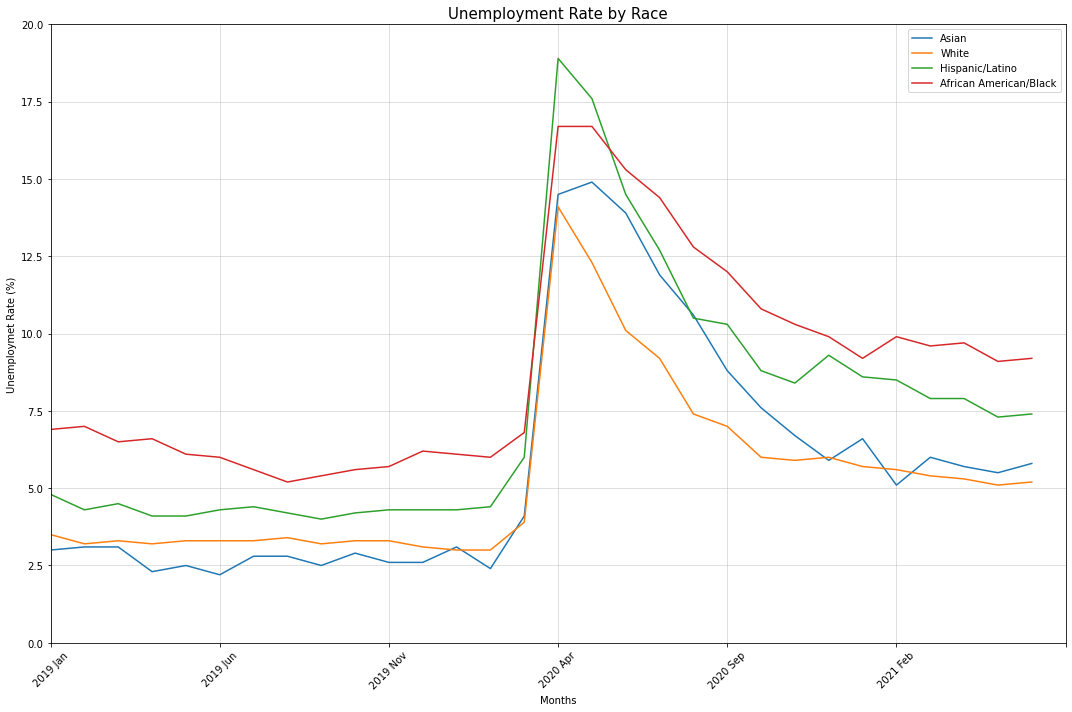

In [678]:

combined_data.plot("Months", ['Asian', 'White', 'Hispanic/Latino','African American/Black'], figsize =(15,10))
plt.xticks(rotation=45)
plt.xlim(0,30)
#plt.xticks(np.arange(min(x), max(x), 1))
plt.ylim(0,20)
plt.title("Unemployment Rate by Race", size = 15)
plt.xlabel("Months", size = 10)
plt.ylabel("Unemploymet Rate (%)", size = 10)
plt.grid(b=None, which='major', axis='both', alpha = 0.5) 


plt.tight_layout()
plt.savefig("Images/VD/Unemployment Rate by Race.png")
plt.show()

In [679]:



White_max_month = combined_data.loc[:, "White"].max()
print(White_max_month)
print("-------------------------------")


14.1
-------------------------------


# Highest Unemployment Rate by Race

In [680]:
Demographics_by_State = pd.read_excel("Data/VD/State Unemployment by Demographics.xlsx")
Demographics_by_State

,State \nFIPS \ncode,Group \ncode,State,Population group,Civilian non-institutional population,Total,Percent of population,Employed Total,Employed Percent of population,Unemployed Total,Unemployed Rate,Unemployed Error range of rate(1)
0,1,1,Alabama,Total,3882,2232,57.5,2099,54.1,133,6.0,5.2 – 6.8
1,1,2,Alabama,Men,1834,1163,63.4,1098,59.9,65,5.6,4.6 – 6.6
2,1,3,Alabama,Women,2048,1069,52.2,1001,48.9,68,6.4,5.2 – 7.6
3,1,4,Alabama,White,2715,1572,57.9,1494,55.0,77,4.9,4.1 – 5.7
4,1,5,Alabama,"White, men",1317,871,66.1,832,63.2,39,4.5,3.4 – 5.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,56,42,Wyoming,"White, 25 to 34 years",68,56,83.0,54,79.3,3,4.4,2.5 – 6.3
2355,56,43,Wyoming,"White, 35 to 44 years",68,61,89.1,58,85.4,2,4.1,2.3 – 5.9
2356,56,44,Wyoming,"White, 45 to 54 years",56,48,85.9,46,82.5,2,4.0,2.0 – 6.0
2357,56,45,Wyoming,"White, 55 to 64 years",76,51,66.4,48,63.3,2,4.8,2.7 – 6.9


In [681]:
Race_by_State = Demographics_by_State[["State","Population group","Unemployed Rate"]]
Race_by_State

,State,Population group,Unemployed Rate
0,Alabama,Total,6.0
1,Alabama,Men,5.6
2,Alabama,Women,6.4
3,Alabama,White,4.9
4,Alabama,"White, men",4.5
...,...,...,...
2354,Wyoming,"White, 25 to 34 years",4.4
2355,Wyoming,"White, 35 to 44 years",4.1
2356,Wyoming,"White, 45 to 54 years",4.0
2357,Wyoming,"White, 55 to 64 years",4.8


In [682]:
Race_List = ["Asian","White", "Black or African American","Hispanic or Latino ethnicity"]

White_by_State = Race_by_State.loc[Race_by_State["Population group"] == "White",:].max()
print(White_by_State)
print("-------------------------------")

Asian_by_State = Race_by_State.loc[Race_by_State["Population group"] == "Asian",:].max()
print(Asian_by_State)

print("-------------------------------")
Latino_by_State = Race_by_State.loc[Race_by_State["Population group"] == "Hispanic or Latino ethnicity",:].max()
print(Latino_by_State)

print("-------------------------------")
Black_by_State = Race_by_State.loc[Race_by_State["Population group"] == "Black or African American",:].max()
print(Black_by_State)



State               Wyoming
Population group      White
Unemployed Rate        11.8
dtype: object
-------------------------------
State               Washington
Population group         Asian
Unemployed Rate           16.9
dtype: object
-------------------------------
State                                    Wyoming
Population group    Hispanic or Latino ethnicity
Unemployed Rate                             15.3
dtype: object
-------------------------------
State                               Wisconsin
Population group    Black or African American
Unemployed Rate                          19.1
dtype: object


In [683]:
Highest_Race = pd.DataFrame({
                                'Race-1': Asian_by_State,
                                'Race-2': White_by_State,
                                'Race-3': Latino_by_State,
                                'Race-4': Black_by_State

                            })
Highest_Race

,Race-1,Race-2,Race-3,Race-4
State,Washington,Wyoming,Wyoming,Wisconsin
Population group,Asian,White,Hispanic or Latino ethnicity,Black or African American
Unemployed Rate,16.9,11.8,15.3,19.1


In [684]:

Highest_Race = pd.DataFrame({
                                'Population Group': Race_List
                                #'State with Highest Unemployment Rate': 
                                #'Highest Unemployment Rate':

                            })
Highest_Race

,Population Group
0,Asian
1,White
2,Black or African American
3,Hispanic or Latino ethnicity


In [706]:
White_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "White",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_White_Across_US = White_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Whites'})
print(Rename_White_Across_US)

print("-------------------------------")

Latino_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "Hispanic or Latino ethnicity",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_Latino_Across_US = Latino_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Hispanincs'})
print(Rename_White_Across_US)

print("-------------------------------")

African_American_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "Black or African American",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_African_American_Across_US = African_American_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Black/African-Americans'})
print(Rename_African_American_Across_US)


print("-------------------------------")








                                 State  Unemployed Rate in Whites
Population group                                                 
White                           Hawaii                       11.8
White                           Nevada                       11.8
White                       California                        9.9
White                         New York                        9.1
White                       New Jersey                        9.0
White                     Rhode Island                        8.6
White                         Illinois                        8.5
White                    Massachusetts                        8.5
White                         Michigan                        8.4
White                    West Virginia                        7.9
White                       Washington                        7.9
White                           Oregon                        7.9
White                       New Mexico                        7.8
White     

In [707]:
race1_data = pd.merge(Rename_Asian_Across_US, Rename_White_Across_US, on = "State", how = "left")
race2_data = pd.merge(race1_data, Rename_Latino_Across_US, on = "State", how = "left")
races_merged = pd.merge(race2_data, Rename_African_American_Across_US, on = "State", how = "left")
arrange_race = races_merged.sort_values(by ="State", ascending = True)
arrange_race

,State,Unemployed Rate in Asians,Unemployed Rate in Whites,Unemployed Rate in Hispanincs,Unemployed Rate in Black/African-Americans
26,Alaska,5.4,5.5,7.7,5.2
7,Arizona,9.5,7.2,8.4,7.4
6,California,9.6,9.9,11.7,12.2
3,Colorado,11.7,6.9,9.6,9.1
12,Connecticut,8.5,7.6,10.0,7.4
25,Delaware,5.6,6.9,9.9,10.7
29,District of Columbia,4.0,4.1,8.9,14.7
24,Florida,6.0,7.3,9.5,11.2
18,Georgia,7.0,5.3,6.9,8.5
1,Hawaii,12.1,11.8,12.6,13.9


In [708]:
arrange_race['Average Rate per State'] = arrange_race.mean(numeric_only=True, axis=1)
arrange_race

,State,Unemployed Rate in Asians,Unemployed Rate in Whites,Unemployed Rate in Hispanincs,Unemployed Rate in Black/African-Americans,Average Rate per State
26,Alaska,5.4,5.5,7.7,5.2,5.950000
7,Arizona,9.5,7.2,8.4,7.4,8.125000
6,California,9.6,9.9,11.7,12.2,10.850000
3,Colorado,11.7,6.9,9.6,9.1,9.325000
12,Connecticut,8.5,7.6,10.0,7.4,8.375000
25,Delaware,5.6,6.9,9.9,10.7,8.275000
29,District of Columbia,4.0,4.1,8.9,14.7,7.925000
24,Florida,6.0,7.3,9.5,11.2,8.500000
18,Georgia,7.0,5.3,6.9,8.5,6.925000
1,Hawaii,12.1,11.8,12.6,13.9,12.600000


In [709]:
sort_race = arrange_race.sort_values(by ="Average Rate per State", ascending = False)
sort_race

,State,Unemployed Rate in Asians,Unemployed Rate in Whites,Unemployed Rate in Hispanincs,Unemployed Rate in Black/African-Americans,Average Rate per State
0,Nevada,16.9,11.8,15.2,18.5,15.600000
1,Hawaii,12.1,11.8,12.6,13.9,12.600000
4,Pennsylvania,10.2,7.8,14.4,17.2,12.400000
2,New York,11.7,9.1,14.3,12.0,11.775000
21,Michigan,6.9,8.4,12.4,19.1,11.700000
8,Massachusetts,9.1,8.5,15.3,12.2,11.275000
11,Ohio,8.5,7.1,13.2,15.5,11.075000
6,California,9.6,9.9,11.7,12.2,10.850000
5,Rhode Island,9.9,8.6,15.2,9.4,10.775000
13,New Jersey,8.1,9.0,11.5,13.4,10.500000


In [710]:
find_nj = arrange_race.loc[arrange_race["State"] == "New Jersey"]
find_nj

,State,Unemployed Rate in Asians,Unemployed Rate in Whites,Unemployed Rate in Hispanincs,Unemployed Rate in Black/African-Americans,Average Rate per State
13,New Jersey,8.1,9.0,11.5,13.4,10.5


# Trends among Asian Workers

Asian workers have seen uncharacteristically high unemployment rates throughout the pandemic, with their overall rate still just above 5% in June 2021. 


During 2020, Asian workers saw unemployment rates above 10% in 5 of the 30 states for which there was available unemployment data, with the highest rates in Nevada (16.9%), and Hawaii (12.1%). 

District of Columbia state saw the lowest Asian unemployment rate among the available states, at 4.0%.This rate was also below that of white workers in that state, whose unemployment rate was 4.1%. 

In the state of New jersey as well the rate for Asian population was lowest among other races at 8.1% well below average rate of the state (10.5%).

In [685]:
Asian_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "Asian",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_Asian_Across_US = Asian_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Asians'})
Rename_Asian_Across_US

,State,Unemployed Rate in Asians
Population group,,
Asian,Nevada,16.9
Asian,Hawaii,12.1
Asian,New York,11.7
Asian,Colorado,11.7
Asian,Pennsylvania,10.2
Asian,Rhode Island,9.9
Asian,California,9.6
Asian,Arizona,9.5
Asian,Massachusetts,9.1


In [686]:
Rename_Asian_Across_US.head(3)

,State,Unemployed Rate in Asians
Population group,,
Asian,Nevada,16.9
Asian,Hawaii,12.1
Asian,New York,11.7


In [687]:
Overall_rate_asian = Rename_Asian_Across_US['Unemployed Rate in Asians'].mean
Overall_rate_asian()

8.12

In [688]:
Rename_Asian_Across_US['State'].count()

30

,State,Unemployed Rate in Asians,Unemployed Rate in Whites,Unemployed Rate in Hispanincs,Unemployed Rate in Black/African-Americans,Average Rate per State
13,New Jersey,8.1,9.0,11.5,13.4,10.5


# Trends among African-American Workers

In [694]:
Black_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "Black or African American",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_Black_Across_US = Black_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Black or African American'})
Rename_Black_Across_US

,State,Unemployed Rate in Black or African American
Population group,,
Black or African American,Michigan,19.1
Black or African American,Nevada,18.5
Black or African American,Pennsylvania,17.2
Black or African American,Wisconsin,16.2
Black or African American,New Mexico,15.8
Black or African American,Ohio,15.5
Black or African American,District of Columbia,14.7
Black or African American,Illinois,14.4
Black or African American,Hawaii,13.9


In [698]:
Overall_rate_black = Rename_Black_Across_US['Unemployed Rate in Black or African American'].mean
Overall_rate_black()

11.209756097560977

In [701]:
Rename_Black_Across_US['State'].count()

41

In [695]:
White_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "White",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_White_Across_US = White_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in White'})
Rename_White_Across_US

,State,Unemployed Rate in White
Population group,,
White,Hawaii,11.8
White,Nevada,11.8
White,California,9.9
White,New York,9.1
White,New Jersey,9.0
White,Rhode Island,8.6
White,Illinois,8.5
White,Massachusetts,8.5
White,Michigan,8.4


In [699]:
Overall_rate_white = Rename_White_Across_US['Unemployed Rate in White'].mean
Overall_rate_white()

6.603921568627449

In [702]:
Rename_White_Across_US['State'].count()

51

In [696]:
Latino_Across_US = ((Race_by_State.loc[Race_by_State["Population group"] == "Hispanic or Latino ethnicity",:]).set_index(["Population group"])).sort_values(by ="Unemployed Rate", ascending = False)
Rename_Latino_Across_US = Latino_Across_US.rename(columns = {'Unemployed Rate':'Unemployed Rate in Hispanics'})
Rename_Latino_Across_US

,State,Unemployed Rate in Hispanics
Population group,,
Hispanic or Latino ethnicity,Massachusetts,15.3
Hispanic or Latino ethnicity,Rhode Island,15.2
Hispanic or Latino ethnicity,Nevada,15.2
Hispanic or Latino ethnicity,New Hampshire,15.0
Hispanic or Latino ethnicity,Pennsylvania,14.4
Hispanic or Latino ethnicity,New York,14.3
Hispanic or Latino ethnicity,Ohio,13.2
Hispanic or Latino ethnicity,Hawaii,12.6
Hispanic or Latino ethnicity,Michigan,12.4


In [700]:
Overall_rate_Latino = Rename_Latino_Across_US['Unemployed Rate in Hispanics'].mean
Overall_rate_Latino()

9.58695652173913

In [703]:
Rename_Latino_Across_US['State'].count()

46

                                 State  Unemployed Rate in Whites
Population group                                                 
White                           Hawaii                       11.8
White                           Nevada                       11.8
White                       California                        9.9
White                         New York                        9.1
White                       New Jersey                        9.0
White                     Rhode Island                        8.6
White                         Illinois                        8.5
White                    Massachusetts                        8.5
White                         Michigan                        8.4
White                    West Virginia                        7.9
White                       Washington                        7.9
White                           Oregon                        7.9
White                       New Mexico                        7.8
White     

,State,Unemployed Rate in Asians,Unemployed Rate in Whites,Unemployed Rate in Hispanincs,Unemployed Rate in Black/African-Americans
26,Alaska,5.4,5.5,7.7,5.2
7,Arizona,9.5,7.2,8.4,7.4
6,California,9.6,9.9,11.7,12.2
3,Colorado,11.7,6.9,9.6,9.1
12,Connecticut,8.5,7.6,10.0,7.4
25,Delaware,5.6,6.9,9.9,10.7
29,District of Columbia,4.0,4.1,8.9,14.7
24,Florida,6.0,7.3,9.5,11.2
18,Georgia,7.0,5.3,6.9,8.5
1,Hawaii,12.1,11.8,12.6,13.9


# Unemployment Rate in June'21 using Choropleth Map

In [640]:
US_state_df = pd.read_excel("Data/VD/June21.xlsx")
US_state_df.sort_values(by ="States", ascending = True)

,States,Unemployment Rate in June 2021,Rank
6,Alabama,3.3,7
38,Alaska,6.6,39
39,Arizona,6.8,40
18,Arkansas,4.4,19
45,California,7.7,46
34,Colorado,6.2,35
49,Connecticut,7.9,50
32,Delaware,5.8,33
42,District of Columbia,7.0,43
25,Florida,5.0,26


In [641]:
US_state_df.max()

States                            Wyoming
Unemployment Rate in June 2021        7.9
Rank                                   50
dtype: object

In [654]:

fp ="Data/VD/USA_adm1.shx"

map_df = gpd.read_file(fp)
#map_df.plot(figsize=(100, 100))
print(map_df)


                                             geometry
0   MULTIPOLYGON (((-88.11320 30.22623, -88.11291 ...
1   MULTIPOLYGON (((-179.13147 51.20972, -179.1322...
2   MULTIPOLYGON (((-141.31459 60.05416, -141.3125...
3   POLYGON ((-110.53930 37.00423, -110.47991 37.0...
4   POLYGON ((-93.36903 36.49686, -93.36530 36.496...
5   MULTIPOLYGON (((-117.23285 32.77641, -117.2330...
6   POLYGON ((-104.13991 41.00190, -104.05284 41.0...
7   MULTIPOLYGON (((-73.65778 40.98278, -73.65781 ...
8   MULTIPOLYGON (((-75.09446 38.43233, -75.09415 ...
9   POLYGON ((-77.00851 38.96956, -76.98849 38.954...
10  MULTIPOLYGON (((-81.96347 24.52542, -81.96347 ...
11  MULTIPOLYGON (((-81.48306 30.77667, -81.48222 ...
12  MULTIPOLYGON (((-155.84998 20.26800, -155.8494...
13  POLYGON ((-116.05072 49.00005, -116.05074 48.8...
14  POLYGON ((-89.97443 42.50811, -89.95730 42.507...
15  POLYGON ((-85.66060 41.76081, -85.57629 41.760...
16  POLYGON ((-93.49643 43.50395, -93.28439 43.503...
17  POLYGON ((-100.68540 40.

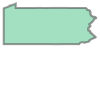

In [643]:
map_df.loc[39,'geometry']

In [644]:
#plt.rcParams['figure.figsize'] =[50,70]
#map_df.plot()

In [648]:
merged = map_df.join(US_state_df)
merged = merged.dropna()
merged = merged[['States', 'geometry', 'Unemployment Rate in June 2021', 'Rank']]
print(merged)

 

                  States                                           geometry  \
0               Nebraska  MULTIPOLYGON (((-88.11320 30.22623, -88.11291 ...   
1                   Utah  MULTIPOLYGON (((-179.13147 51.20972, -179.1322...   
2          New Hampshire  MULTIPOLYGON (((-141.31459 60.05416, -141.3125...   
3           South Dakota  POLYGON ((-110.53930 37.00423, -110.47991 37.0...   
4                  Idaho  POLYGON ((-93.36903 36.49686, -93.36530 36.496...   
5                Vermont  MULTIPOLYGON (((-117.23285 32.77641, -117.2330...   
6                Alabama  POLYGON ((-104.13991 41.00190, -104.05284 41.0...   
7                 Kansas  MULTIPOLYGON (((-73.65778 40.98278, -73.65781 ...   
8                Montana  MULTIPOLYGON (((-75.09446 38.43233, -75.09415 ...   
9               Oklahoma  POLYGON ((-77.00851 38.96956, -76.98849 38.954...   
10             Wisconsin  MULTIPOLYGON (((-81.96347 24.52542, -81.96347 ...   
11               Georgia  MULTIPOLYGON (((-81.48306 

In [646]:
Rates = 'Unemployment Rate in June 2021'
vmin = 0
vmax = max(Rates)

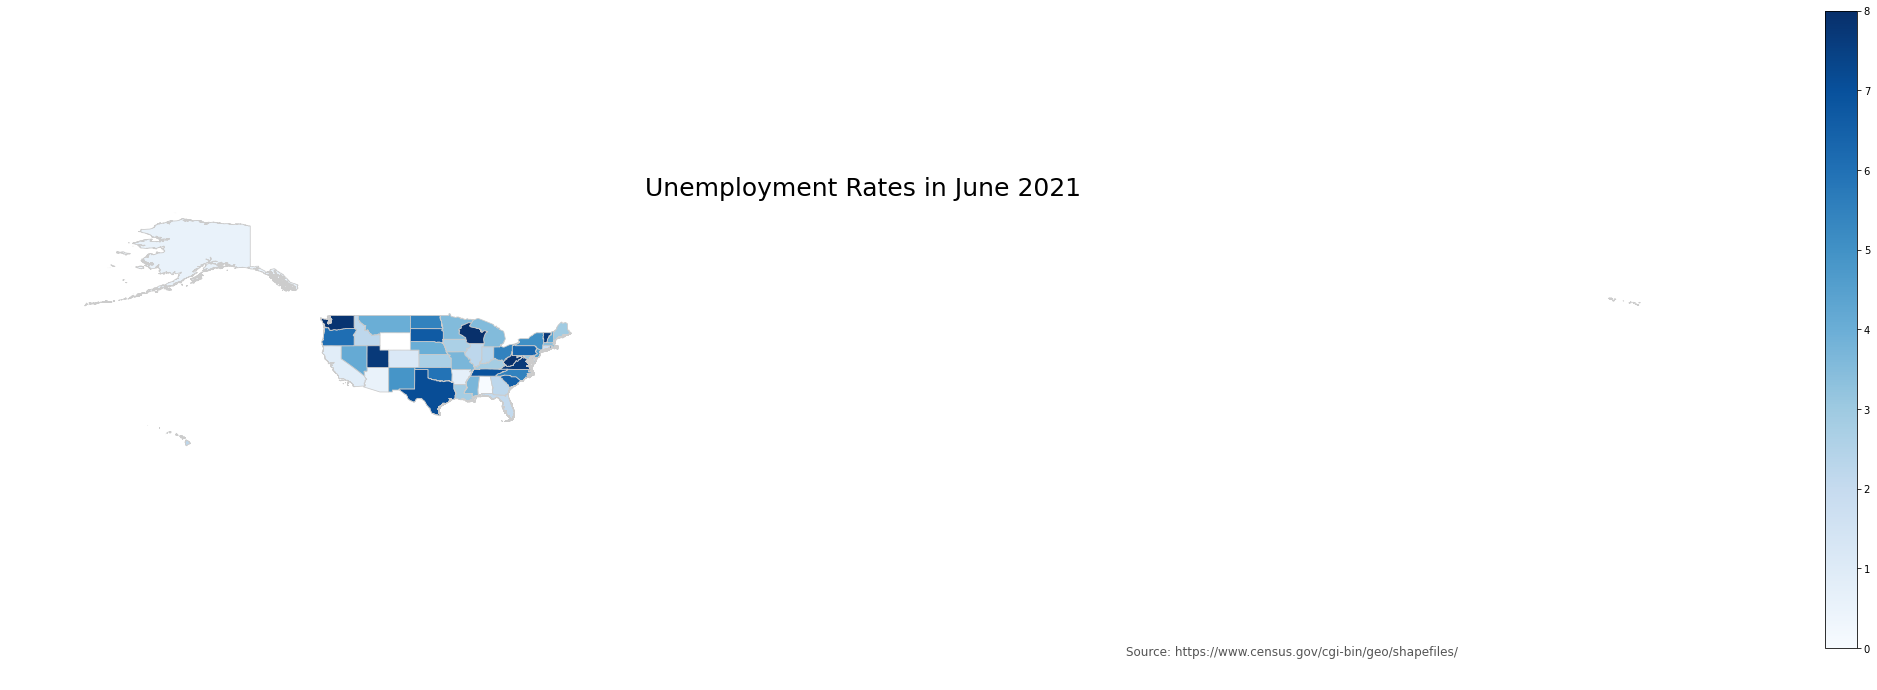

In [647]:
# set the value column that will be visualised
variable = 'Unemployment Rate in June 2021'
# set the range for the choropleth values
vmin, vmax = 0, 8

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Unemployment Rates in June 2021', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: https://www.census.gov/cgi-bin/geo/shapefiles/ ', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. 

# add the colorbar to the figure
fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(500, 500))

plt.tight_layout()
plt.savefig("Images/VD/Unemployment Rates in June 2021.png")